# Explore here

El top 3 más popular es:
  Nombre de la canción  Popularidad  Duración (minutos)
0         Fe de Errata           56                3.10
1                光 Luz           55                4.73
2        Mista Uanteik           54                4.34


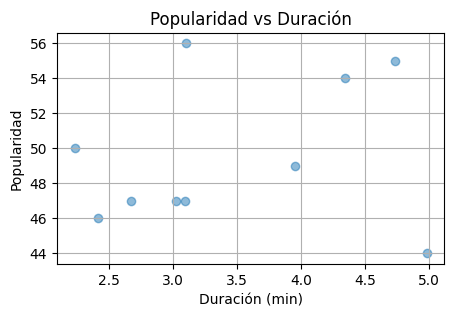

No existe relación lineal entre la duración de la canción y su popularidad, ya que R^2 es: 0.03735


In [2]:
from dotenv import load_dotenv
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Cargar variables de entorno desde el archivo .env
load_dotenv()

# Acceder a las variables de entorno
client_id = os.getenv("CLIENT_ID")
client_secret = os.getenv("CLIENT_SECRET")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)


instancia = spotipy.Spotify(auth_manager=auth_manager)

artist_id = '0qHbO3z6lgLE6ZYCkQBo1K'


top_tracks = instancia.artist_top_tracks(artist_id)


data = []
for track in top_tracks['tracks'][0:10]:
    track_name = track['name']
    popularity = track['popularity']
    duration_ms = track['duration_ms']
    duration_min = round(duration_ms / (60 * 1000),2)

    data.append({
        'Nombre de la canción': track_name,
        'Popularidad': popularity,
        'Duración (minutos)': duration_min
    })

# Crea un DataFrame de pandas
df = pd.DataFrame(data)

# Se ordena el dataframe por popularidad
df = df.sort_values(by='Popularidad', ascending=False)

#se muestra top 3 por popularidad

print('El top 3 más popular es:')
print(df.head(3))

#Verificacion de relacion entre duracion y popularidad

plt.figure(figsize = (5, 3))
plt.scatter(df['Duración (minutos)'], df['Popularidad'], alpha=0.5)
plt.title('Popularidad vs Duración')
plt.xlabel('Duración (min)')
plt.ylabel('Popularidad')
plt.grid(True)
plt.show()


slope, intercept, r_value, p_value, std_err = linregress(df['Duración (minutos)'], df['Popularidad'])
r_squared = round(r_value**2,5)

if r_squared < 0.5:

    print(f'No existe relación lineal entre la duración de la canción y su popularidad, ya que R^2 es: {r_squared}')

else:

    print(f'Existe relación lineal entre la duración de la cancion y su popularidad, ya que R^2 es: {r_squared}')